<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Naïve-Bayes" data-toc-modified-id="Naïve-Bayes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naïve Bayes</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Predict</a></span></li></ul></li><li><span><a href="#With-Logistic-Regression" data-toc-modified-id="With-Logistic-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>With Logistic Regression</a></span></li></ul></div>

# Machine Learning Homework 1 - Spam Filtering with Multinomial NB

## Imports

In [36]:
import os
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

## Loading the data

In [37]:
with open('D:\\Users\\Victor\\Documents\\ING 5\\ML\\messages.txt') as file:
    messages, X, Y = [], [], []
    for line in file:
        messages.append(word_tokenize(line.lower()))
    
    for el in messages:
        X.append(el[1:])
        Y.append(1) if el[0] =='spam' else Y.append(0)

In [38]:
lemma = WordNetLemmatizer()
stopW = stopwords.words('english')

def preprocessing(sent):
    tokens = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(word,pos='a'),pos='v'),pos='n') for word in sent if word not in stopW]
    return tokens

messages_preprocessed = [preprocessing(sent) for sent in X]

Let's divide the data into training and testing: 80/20

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(messages_preprocessed, Y, test_size = 0.2)

In [40]:
allWords = [word for sentence in X_train for word in sentence]

dictionary = Counter(allWords)
print('There are {} entries in the dictionary'.format(len(dictionary)))

There are 7072 entries in the dictionary


Let's get rid of words with non-alphanumeric characters, of length 1 and appearing only once in the corpus

In [41]:
for word in list(dictionary):
    if (word.isalpha()==False):
        del dictionary[word]
    if (len(word)==1):
        del dictionary[word]
dictionary=dictionary.most_common(3000)
print('There are {} entries in the dictionary'.format(len(dictionary)))

There are 3000 entries in the dictionary


In [42]:
def features_matrix(X):
    features_matrix = np.zeros((len(X),len(dictionary)))

    for sent_id, sentence in enumerate(X):
        for word in sentence:
            for id_dic, dic in enumerate(dictionary):
                if(dic[0]==word):
                    features_matrix[sent_id][id_dic] = sentence.count(word)
    return features_matrix

In [43]:
features_matrix_train = features_matrix(X_train)

## Naïve Bayes
### Train

In [44]:
Py1 , Py0 = np.zeros((3000,1)), np.zeros((3000,1))

for j, x in enumerate(features_matrix_train):
    for pos, feature in enumerate(x):
        if feature>0:
            if Y_train[j]==1:
                Py1[pos]+=feature
            else:
                Py0[pos]+=feature
Py1 = (Py1+1)/(np.count_nonzero(Y_train)+2)
Py0 = (Py0+1)/((len(Y_train)-np.count_nonzero(Y_train))+2)
PY = (np.sum(Y_train)+1)/(len(Y_train)+2)

### Predict

In [45]:
features_matrix_test = features_matrix(X_test)

In [46]:
def predict(test):
        
    mat0, mat1 = [], []
    
    for i, el in enumerate(test):
        if el == 0:
            mat0.append(1 -Py0[i])
            mat1.append(1 - Py1[i])
        else:
            mat0.append(Py0[i]*el)
            mat1.append(Py1[i]*el)
    
    prod0 = np.product(mat0)
    prod1 = np.product(mat1)
    
    return np.argmax([(prod0*(1-PY)), (prod1*PY)])

In [47]:
Y_pred = []
for el in features_matrix_test:
    Y_pred.append(predict(el.reshape(3000,1)))

In [48]:
def accuracy(Y_pred, Y_test):
    acc = 0
    for i, el in enumerate(Y_pred):
        if el == Y_test[i]:
            acc += 1
    return acc/len(Y_pred)

The Classifier has an accuracy of 0.981 and F1 score of 0.9140271493212669


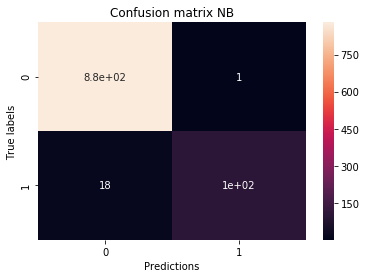

In [49]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)
plt.title('Confusion matrix NB')
plt.xlabel('Predictions')
plt.ylabel('True labels')
print('The Classifier has an accuracy of {} and F1 score of {}'.format(accuracy(Y_pred, Y_test), f1_score(Y_test, Y_pred)))
plt.show()

## With Logistic Regression

In [50]:
log_reg = LogisticRegression()
log_reg.fit(features_matrix_train, Y_train)
y_log_reg_pred = log_reg.predict(features_matrix_test)

The Logistic Regression Classifier has an accuracy of 0.98 and F1 score of 0.912280701754386


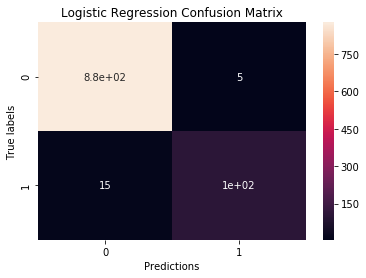

In [51]:
sns.heatmap(confusion_matrix(Y_test, y_log_reg_pred), annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True labels')
print('The Logistic Regression Classifier has an accuracy of {} and F1 score of {}'.format(accuracy(y_log_reg_pred, Y_test), f1_score(Y_test, y_log_reg_pred)))
plt.show()